# Unit 5A - Autoencoders

### Bibliography 


Commented bibliography:
* _Chollet - Deep Learning with python_: a section on variational autoencoders vs GANs as tools to generate images
* _Ferlitsch - Deep Learning Patterns and Practices_: a chapter on autoencoders (nothing on variational autoencoders). It covers several topics, but briefly. In depth only convolutional autoencoders and super-resolution.
* _Patterson - Deep Learning  A Practitioner's approach_: it describes autoencoders in two paragraphs.
* _Buduma - Fundamentals of Deep learning - 2nd Ed_: it has a chapter on "generative models" that explains autoencoders (including variational autoencoders and denoising) and GANs. Very theoretical, with many formulas and a short example of implementation in pytorch.
* _Foster_ - _Generative Deep Learning_: a chapter on variational autoencoders. The chapter is divided into two parts: autoencoders in general and variational autoencoders (more deeply). Good examples around an art gallery run by two brothers (N. Coder and D. Coder).
* _Géron_ - _Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow - 2nd Ed_: a long chapter on autoencoders and GANS. It covers everything: convolutional, recurrent, denoising, sparse and variational autoencoders. Nothing on autoencoders for anomaly detection.


### Main ideas

Autoencoders are neural networks that:
* learn __latent representations__ or __codings__: dense representations from the data with lower dimensionality
* are capable of __unsupervised training__ (training sets are unlabeled)
* act as __feature detectors__ useful for unsupervised pretraining


## 5A.1 Introduction

An analogy: expert chess players are capable of memorize the positions of all pieces in the board just looking at it for five seconds. This is the case only when pieces are in realistic positions.

What happens is that players learn __patterns__ due to their experience with the game.

An autoencoder is composed by three parts:
1. An __encoder__ (recognition network): converts the input to a __latent representation__. It compresses the information into an encoded representation much smaller than the input data.
2. The __bottleneck__: a module that contains the compressed representation.
3. A __decoder__ (generative network): converts the internal representation to an output. It reconstructs the data back from its encoded form.

The complete arquitecture is something like this:

<p style="text-align: center;"> <img src="U5A-images/SimpleAutoencoder.png" alt="drawing" width="70%"/>
    
Usually, both encoder and decoder are composed by several layers that reduce/increase the dimension of the input in steps until reaching the bottleneck. This structure extract most from the image in form of data, since in the bottleneck we have a compressed representation of the input data.
    
How big must the bottleneck be? Well... the size should be the result of a tradeoff:
* The bigger the bottleneck, the bigger the risk of overfitting
* The smaller the bottleneck, the smaller the amount of information extracted from the input, then the bigger the chances of discarding important information.

<p style="text-align: center;"> <img src="U5A-images/Autoencoder.webp" alt="drawing" width="70%"/>

Autoencoders are related to PCA (Principal Components Analysis): a single layered autoencoder with a linear activation function is very similar to PCA.

According to the Wikipedia: _"PCA is a statistical technique for reducing the dimensionality of a dataset. This is accomplished by linearly transforming the data into a new coordinate system where (most of) the variation in the data can be described with fewer dimensions than the initial data."_

<p style="text-align: center;"> <img src="U5A-images/AutoencoderPCA.png" alt="drawing" width="70%"/>
    
One important limitation of PCA is that if features have non-linear relationship with each other than autoencoder will be able to compress the information better into low dimensional latent space, since its capable of modelling complex non-linear functions.
    
<p style="text-align: center;"> <img src="U5A-images/AutoencoderVSpca.webp" alt="drawing" width="70%"/>
    
In mathematics, a manifold is a topological space that locally resembles Euclidean space near each point. One-dimensional manifolds are lines and circles, two-dimensional manifolds are surfaces (planes, spheres, torus, etc.) 
    
For higher dimensional data, autoencoders are capable of learning manifolds which can be used to describe observations in a lower dimensionality. The technique where the autoencoder learns a non-linear manifold is also called *manifold learning*
    
<p style="text-align: center;"> <img src="U5A-images/Manifolds.png" alt="drawing" width="90%"/>



Autoencoders were initially devised for dimensionality reduction, but the concept expanded over the years and now is used for more applications that this one. 

We will study five popular types of autoencoders:
* Undercomplete autoencoders
* Sparse autoencoders
* Denoising autoencoders
* Contractive autoencoders
* Variational autoencoders

## 5A.2 Undercomplete autoencoders

Undercomplete autoencoders are the simplest way to construct an autoencoder. The main idea is to limit the number nodes present in the bottleneck, thus limiting the information than can flow through the network. 

<p style="text-align: center;"> <img src="U5A-images/UndercompleteAutoencoder.webp" alt="drawing" width="50%"/>


There is no regularization term: we train the model according to the _reconstruction loss_. Since there is no regularization term, the only way to ensure that the model is not just memorizing the data is to reduce the size of the bottleneck. 

Now we are going to see a full undercomplete autoencoder example on the MNIST set.

<font size="4">__Example: loading the dataset__</font>

Train: (60000, 784)  - Test: (10000, 784)


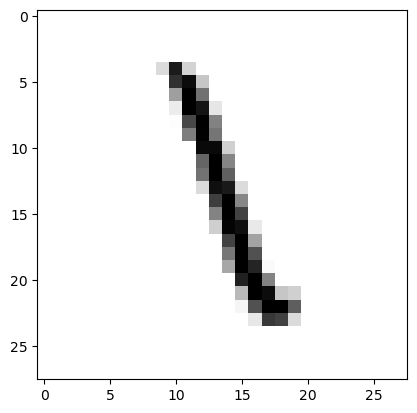

The digit is:  1


In [6]:
from tensorflow.keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train=x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test=x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

print("Train:",x_train.shape, " - Test:", x_test.shape)



# Shows one of the images
import random
num = random.randrange(len(x_train))
import matplotlib.pyplot as plt
fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.imshow(x_train[num].reshape((28,28)), cmap='binary')
plt.show()
print("The digit is: ",y_train[num])


### Example: the encoder

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
encoder=Sequential()
encoder.add(Dense(256, activation='relu',input_shape=(784,)))
encoder.add(Dense(48, activation='relu'))
encoder.add(Dense(2))
encoder.build()
encoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 48)                12336     
                                                                 
 dense_8 (Dense)             (None, 2)                 98        
                                                                 
Total params: 213,394
Trainable params: 213,394
Non-trainable params: 0
_________________________________________________________________


Comments on the encoder:
* At the output we have, for each digit, a point in a two-dimensional space
* We use three dense layers to reduce dimensionality

### Example: the decoder

In [8]:
#from tensorflow.keras.layers import Input, Reshape, Conv2DTranspose, Activation
decoder=Sequential()
decoder.add(Dense(48, input_shape=(2,)))
decoder.add(Dense(256, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.build()
decoder.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 48)                144       
                                                                 
 dense_10 (Dense)            (None, 256)               12544     
                                                                 
 dense_11 (Dense)            (None, 784)               201488    
                                                                 
Total params: 214,176
Trainable params: 214,176
Non-trainable params: 0
_________________________________________________________________


Comments on the decoder:
* We use the same structure to recover the dimensionality

### Example: the full undercomplete autoencoder

In [9]:
import keras
from tensorflow import expand_dims

autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

history = autoencoder.fit(x=x_train, y=x_train, batch_size=32, shuffle=True, epochs=20, validation_split=0.2)
# Use 20% of training samples for validation

autoencoder.save("U5A-models/UndercompleteAE.h5")


Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2207 - val_loss: 0.2014
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1964 - val_loss: 0.1918
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1889 - val_loss: 0.1865
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1854 - val_loss: 0.1840
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1830 - val_loss: 0.1818
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1812 - val_loss: 0.1813
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1790 - val_loss: 0.1790
Epoch 9/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1780 - val_loss: 0.1774
Epoch 10/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.177

Comments on the training:
* We are using the same data for the input and the output
* We are reserving 20% or training data for validation. This is only to have data to plot the loss and the validation loss vs. the epoch number

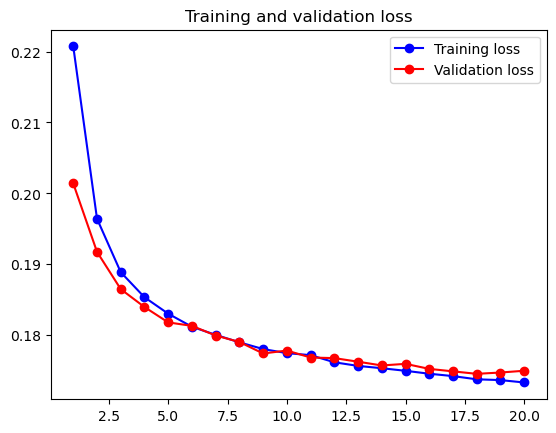

In [10]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "b-o", label="Training loss")
plt.plot(epochs, val_loss, "r-o", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Now that we have our autoencoder fully trained, we can try to predict some images from our test set:

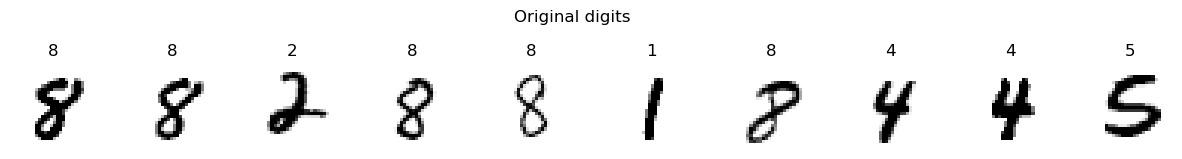

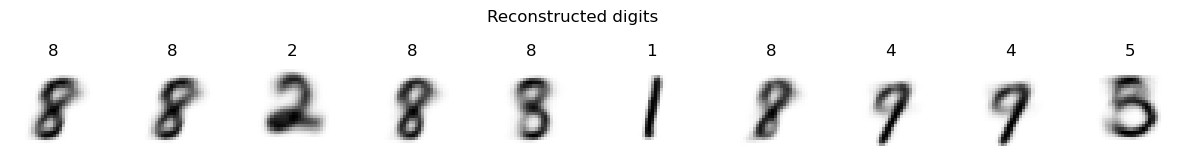

In [11]:
n_to_show = 10
input_idx = np.random.choice(range(len(x_test)), n_to_show)
input_images = x_test[input_idx]
input_labels = y_test[input_idx]

output = autoencoder.predict(input_images)

fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.1, wspace=0.4)
for i in range(n_to_show):
    img = input_images[i].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Original digits')
    ax.imshow(img, cmap='binary')
 

fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    img = output[i].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Reconstructed digits')
    ax.imshow(img, cmap='binary')
    
    

An we can represent the points from the training set in the latent space:

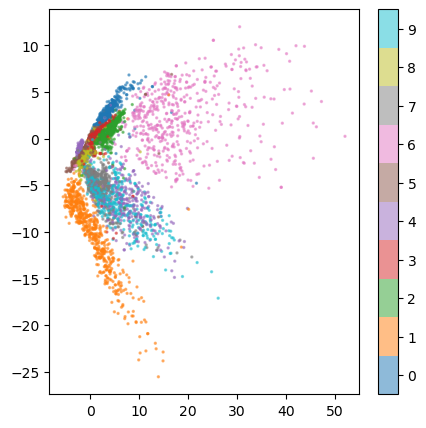

In [12]:
n_to_show = 5000
grid_size = 20
figsize = 8

example_idx = np.random.choice(range(len(x_train)), n_to_show)
example_images = x_train[example_idx]
example_labels = y_train[example_idx]


z_points = encoder.predict(example_images)

plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='tab10',  c=example_labels, alpha=0.5, s=2)
plt.colorbar(values=range(10), ticks=range(10))


There are some interesting points worth commenting on this plot:
* Some digits are represented over a large area and other over a small area. 
* There are digits which correspond to an unique area, and other are mixed 


## 5A.3 Sparse autoencoders

Undercomplete autoencoders are regulated by the size of the bottleneck. Sparse autoencoders are regulated by reducing the number of active nodes at each hidden layer.

It is not possible to have a NN with a flexible number of nodes, then we _penalize the activation of neurons in the hidden layers_. This is equivalent to reduce the size with a bottleneck. See the following figure, where nodes shaded in grey are inactive for a certain input.

<p style="text-align: center;"> <img src="U5A-images/SparseAutoencoder.webp" alt="drawing" width="50%"/>



We get this effect by introducing a _regularization_ term in the loss function to optimize. This is usually done in two ways:

1. __L1 regularization__: it is given by the following formula
    $$ L(x,\hat{x}) + \lambda \sum_i |a^{(h)}_i | $$
    where $a^{(h)}_i$ are the activation coefficients at layer $h$ and $\lambda$ is a regularization parameter
2. __KL Divergence__ (Kullback-Leibler Divergence): this method users a sparsity parameter $\rho$ which defines the target for a layer so that the activations of its neurons follow a Bernoulli Distribution (a discrete distribution where a random variable takes value 1 with probability $\rho$ and 0 with probability $1-\rho$). 
The KL divergence method compares the ideal distribution with sparsity $\rho$ against the observed distribution $\hat{\rho}$ and sums this term to the loss function:
$$ L(x,\hat{x}) + \lambda \sum_j KL(\rho||\hat{\rho}) $$

Obviously, this is applied to the hidden layers of the NN. We are going to see an example of sparse autoencoder using L1 regularization.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1

encoderSparse=Sequential()
encoderSparse.add(Dense(256, activation='relu', input_shape=(784,)))
encoderSparse.add(Dense(128, activity_regularizer=l1(0.001), activation='relu'))
encoderSparse.add(Dense(64, activity_regularizer=l1(0.001) ))
encoderSparse.build()
encoderSparse.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
Total params: 242,112
Trainable params: 242,112
Non-trainable params: 0
_________________________________________________________________


In [14]:
decoderSparse=Sequential()
decoderSparse.add(Dense(128, activity_regularizer=l1(0.001), input_shape=(64,)))
decoderSparse.add(Dense(256, activity_regularizer=l1(0.001), activation='relu'))
decoderSparse.add(Dense(784, activation='sigmoid'))
decoderSparse.build()
decoderSparse.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dense_17 (Dense)            (None, 784)               201488    
                                                                 
Total params: 242,832
Trainable params: 242,832
Non-trainable params: 0
_________________________________________________________________


In [15]:
import keras
from tensorflow import expand_dims

autoencoderSparse = keras.models.Sequential([encoderSparse, decoderSparse])

autoencoderSparse.compile(optimizer='adam', loss = 'binary_crossentropy')

history = autoencoderSparse.fit(x=x_train, y=x_train, batch_size=32, shuffle=True, epochs=20, validation_split=0.2)
# Use 20% of training samples for validation

autoencoderSparse.save("U5A-models/SparseAE.h5")



Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2728 - val_loss: 0.2360
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2266 - val_loss: 0.2145
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2091 - val_loss: 0.2013
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1949 - val_loss: 0.1895
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1866 - val_loss: 0.1833
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1821 - val_loss: 0.1802
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1794 - val_loss: 0.1784
Epoch 8/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1773 - val_loss: 0.1767
Epoch 9/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1757 - val_loss: 0.1750
Epoch 10/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.174

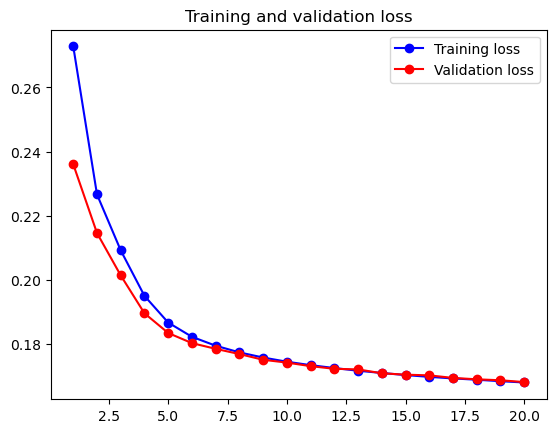

In [16]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "b-o", label="Training loss")
plt.plot(epochs, val_loss, "r-o", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

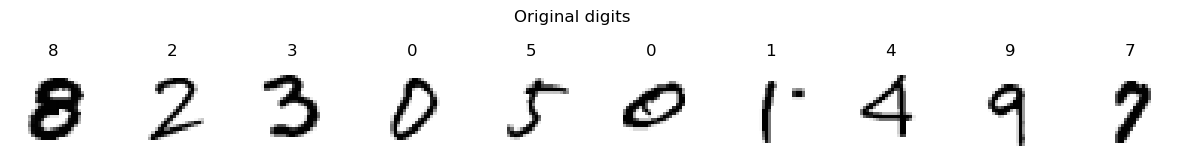

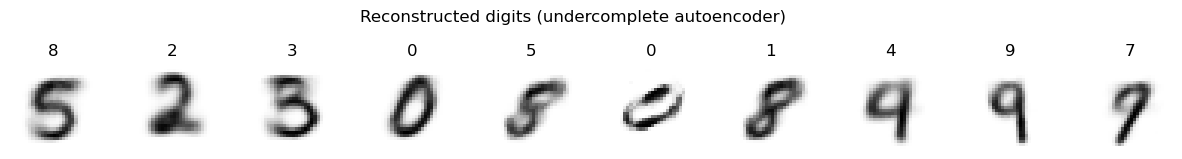

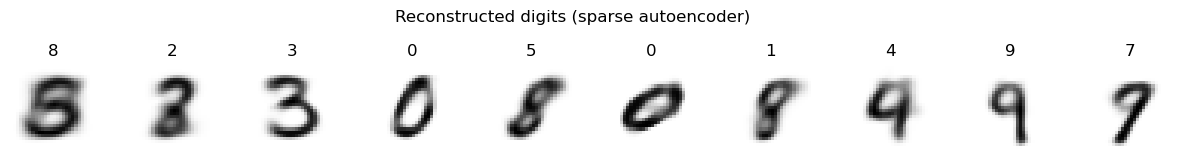

In [17]:
n_to_show = 10
input_idx = np.random.choice(range(len(x_test)), n_to_show)
input_images = x_test[input_idx]
input_labels = y_test[input_idx]

output = autoencoder.predict(input_images)

outputSparse = autoencoderSparse.predict(input_images)

fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.1, wspace=0.4)
for i in range(n_to_show):
    img = input_images[i].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Original digits')
    ax.imshow(img, cmap='binary')
 
fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    img = output[i].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Reconstructed digits (undercomplete autoencoder)')
    ax.imshow(img, cmap='binary')

fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    img = outputSparse[i].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Reconstructed digits (sparse autoencoder)')
    ax.imshow(img, cmap='binary')
    

## 5A.4 Applying autoencoders for anomaly detection

As we saw, autoencoders try to minimize the reconstruction error as part of the training process. 

One possibility is using the reconstruction error as a measure of the distance of a sample to the general characteristics of the training set. In this case we are detecting outliers, that is, we are using the autoencoder as an __anomaly detector__. 

<p style="text-align: center;"> <img src="U5A-images/anomaly.png" alt="drawing" width="50%"/>
<p/>

In the following example, we examine the digits that give the lowest and highest reconstruction error in the validation set. The lowest reconstruction errors are always given by "1" digits, so we take the best sample for each digit.

Reconstructed validation set:  (10000, 784)
(10000,)


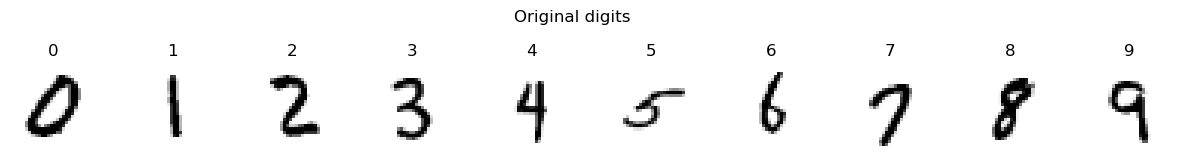

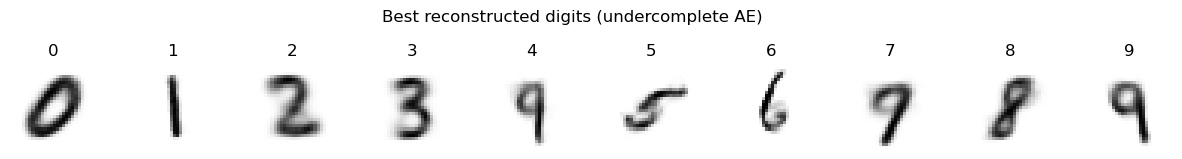

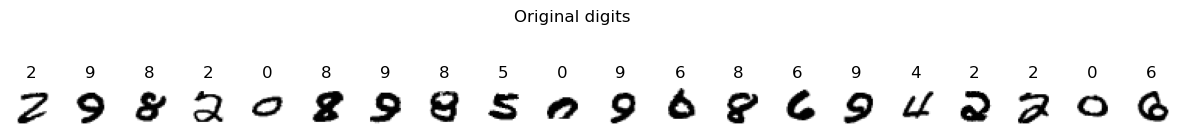

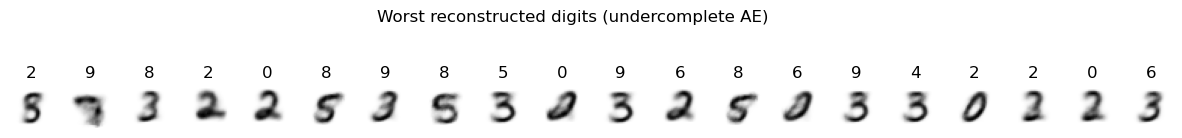

In [18]:
## print("Validation set:", x_valid.shape)

from tensorflow import keras
from tensorflow.keras import backend as K
autoencoder = keras.models.load_model('U5A-models/UndercompleteAE.h5')

output_2 = autoencoder.predict(x_test)

print("Reconstructed validation set: ", output_2.shape)

def r_loss(y_true, y_pred):
    return K.mean(K.square(y_true - y_pred), axis=[1])

errors_2 = r_loss(x_test, output_2)

print(errors_2.shape)


sortedidx = np.argsort(errors_2)

# Best reconstructed digits

bestidx=np.zeros(10, dtype=int)
for i in range(10):
    idx = 0
    while (y_test[sortedidx[idx]]!=i):
        idx += 1
    bestidx[i] = sortedidx[idx]

input_images = x_test[bestidx]
input_labels = y_test[bestidx]

fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.1, wspace=0.4)
for i in range(10):
    img = input_images[i].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Original digits')
    ax.imshow(img, cmap='binary')
 

fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(10):
    img = output_2[bestidx[i]].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Best reconstructed digits (undercomplete AE)')
    ax.imshow(img, cmap='binary')


# Worst reconstructed digits
n_to_show = 20

worstidx = sortedidx[-n_to_show:]

input_images = x_test[worstidx]
input_labels = y_test[worstidx]

fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.1, wspace=0.4)
for i in range(n_to_show):
    img = input_images[i].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Original digits')
    ax.imshow(img, cmap='binary')
 

fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    img = output_2[worstidx[i]].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Worst reconstructed digits (undercomplete AE)')
    ax.imshow(img, cmap='binary')


We could set a threshold to reject bad written digits. This way we are detecting and flagging _anomalies_ in a set of samples.

Typical applications of anomaly detection:
* Network intrusion detection
* Medical systems
* Fraud detection
* Manufacturing defect detection

## 5A.5 Proposed exercise

Using the dataset __cats vs. dogs__ from Unit 3, try to train an undercomplete autoencoder like the one from section _5.2 Undercomplete autoencoders_

Represent the training points in the latent space, with cats and dogs in different colors. Are both sets separated?

Use the autoencoder as an anomaly detector, and examine the best and worst reconstructed images. Can you obtain some conclusions from these images?

## 5A.6 Denoising autoencoders

Autoencoders can be used to __denoising__ or __noise reduction__, which is the process of removing noise from a signal. 

Denoising autoencoders process a noisy image, generating a clean image on the output side.

Important: they are trained by a corrupted version of the training set, but the target at the output is the uncorrupted training data.

<p style="text-align: center;"> <img src="U5A-images/DenoisingAutoencoder.webp" alt="drawing" width="50%"/>
<p/>

Denoising autoencoders were not originally meant to reduce noise from images. Instead, the initial idea was to help:
* The hidden layers to learn more robust filters
* Reduce the risk of overfitting
* Prevent the autoencoder to learn a simple identity function

We start by generating noisy versions of the dataset:

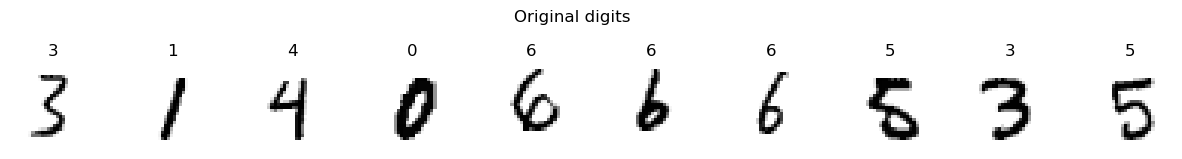

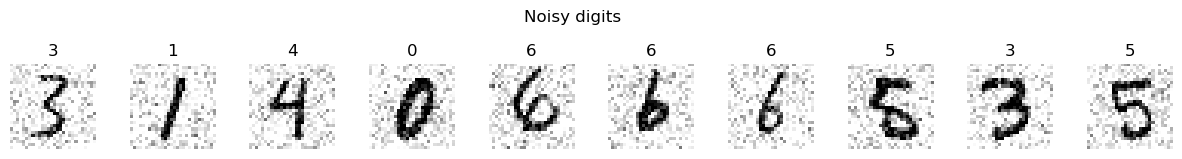

In [19]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n_to_show = 10
input_idx = np.random.choice(range(len(x_train)), n_to_show)
input_images = x_train[input_idx]
input_images_noisy = x_train_noisy[input_idx]
input_labels = y_train[input_idx]


fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.1, wspace=0.4)
for i in range(n_to_show):
    img = input_images[i].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Original digits')
    ax.imshow(img, cmap='binary')
 

fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    img = input_images_noisy[i].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Noisy digits')
    ax.imshow(img, cmap='binary')

In [20]:
denoisingAutoencoder = Sequential()
denoisingAutoencoder.add(Dense(500, input_shape=(784,), activation='relu'))
denoisingAutoencoder.add(Dense(300, activation='relu'))
denoisingAutoencoder.add(Dense(100, activation='relu'))
denoisingAutoencoder.add(Dense(300, activation='relu'))
denoisingAutoencoder.add(Dense(500, activation='relu'))
denoisingAutoencoder.add(Dense(784, activation='sigmoid'))
denoisingAutoencoder.build()
denoisingAutoencoder.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 500)               392500    
                                                                 
 dense_19 (Dense)            (None, 300)               150300    
                                                                 
 dense_20 (Dense)            (None, 100)               30100     
                                                                 
 dense_21 (Dense)            (None, 300)               30300     
                                                                 
 dense_22 (Dense)            (None, 500)               150500    
                                                                 
 dense_23 (Dense)            (None, 784)               392784    
                                                                 
Total params: 1,146,484
Trainable params: 1,146,484
No

Now we train the model.

In [21]:
denoisingAutoencoder.compile(loss='mean_squared_error', optimizer='adam')
history = denoisingAutoencoder.fit(x_train_noisy, x_train,
                validation_data=(x_test_noisy, x_test), epochs=20, batch_size=200)
denoisingAutoencoder.save("U5A-models/DenoisingAE.h5")


Epoch 1/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0412 - val_loss: 0.0190
Epoch 2/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0161 - val_loss: 0.0133
Epoch 3/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0123 - val_loss: 0.0109
Epoch 4/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0106 - val_loss: 0.0098
Epoch 5/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0094 - val_loss: 0.0089
Epoch 6/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0087 - val_loss: 0.0083
Epoch 7/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0081 - val_loss: 0.0081
Epoch 8/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0077 - val_loss: 0.0076
Epoch 9/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 10/20
300/300 [==============================] - 1s 3ms/step - loss: 0.0070 - val_loss: 0.0070

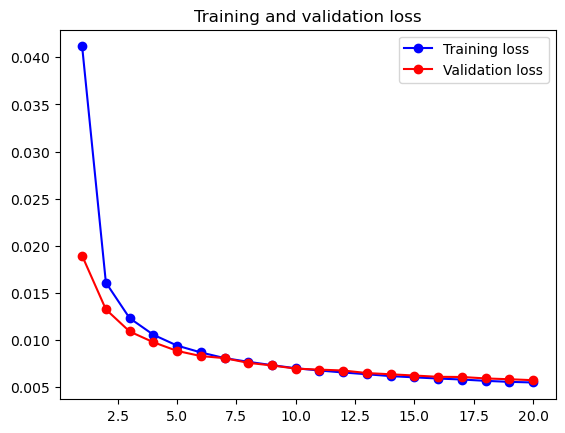

In [22]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "b-o", label="Training loss")
plt.plot(epochs, val_loss, "r-o", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

And we can check the result on the testing dataset

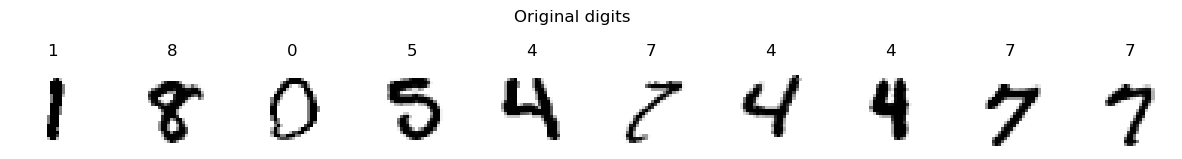

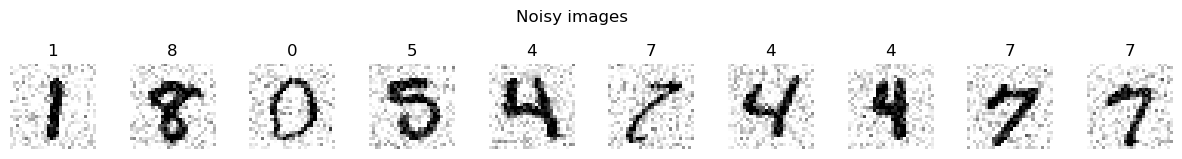

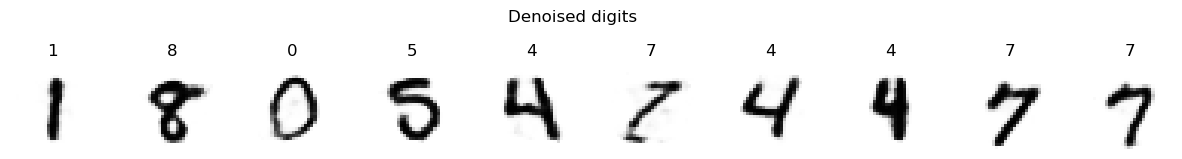

In [23]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

n_to_show = 10
input_idx = np.random.choice(range(len(x_test)), n_to_show)
input_images = x_test[input_idx]
input_labels = y_test[input_idx]
input_images_noisy = x_test_noisy[input_idx]
output_denoised = denoisingAutoencoder(input_images)

fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.1, wspace=0.4)
for i in range(n_to_show):
    img = input_images[i].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Original digits')
    ax.imshow(img, cmap='binary')
 
fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    img = input_images_noisy[i].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Noisy images')
    ax.imshow(img, cmap='binary')

fig = plt.figure(figsize=(15, 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    img = output_denoised[i].reshape((28,28))
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.set_title(input_labels[i])
    fig.suptitle('Denoised digits')
    ax.imshow(img, cmap='binary')

The following image summarizes the whole process:

<p style="text-align: center;"> <img src="U5A-images/DenoisingAutoencoder2.png" alt="drawing" width="80%"/>

One possible application of denoising autoencoders would be to preprocess images to improve the accuracy of an OCR algorithm. 

## 5A.7 Contractive autoencoders

Denoising autoencoders introduce small noise in the training set to increase the robustness against perturbations in the input.

_Contractive autoencoders_ have the same basic idea in their design. In this case, the goal is that _the derivative of the hidden layer activations with respect to the inputs are small_. This means that inputs with small variations maintain a similar encoded state. It is the same idea as denoising autoencoders, but incorporated in the design of the NN, instead of perturbing the training set.

<p style="text-align: center;"> <img src="U5A-images/ContractiveAE.png" alt="drawing" width="50%"/>


In other words, denoising autoencoders make the reconstruction function resist small perturbations of the input, while contractive autoencoders make the feature extraction function resist small perturbations of the input.
    
This is achieved introducing a regularization term that penalizes large derivatives of the hidden activation layer:
$$ L(x,\hat{x}) + \lambda ||J_f(x) ||^2_F $$
where
$$||J_f(x) ||^2_F = \sum_{ij} \left( {\delta h_j(x)}\over{\delta x_i} \right)^2$$
    
The penalty term $\lambda ||J_f(x) ||^2_F$ is the squared _Frobenius norm_ of the Jacobian matrix of partial derivatives of the encoder function (the NN until the bottleneck).   
* $h_j(x)$ are the outputs of the bottleneck
* $x_i$ are the inputs of the neural network
    
Implementation requires to do the training "by hand", since we require to obtain the weights and the values of the network after each batch.
    